# **BIA : CAPSTONE PROJECT**


```
Topic : Employee Retention Prediction
```

- By Shreyash Narvekar


In [1]:
'''
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost
%pip install imblearn
'''

'\n%pip install pandas\n%pip install numpy\n%pip install matplotlib\n%pip install seaborn\n%pip install scikit-learn\n%pip install xgboost\n%pip install imblearn\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('aug_train.csv')

In [5]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


# **EDA**

In [6]:
data.shape

(19158, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [8]:
# Finding Null Values in All Comlumns
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
data.isnull().sum().sum()

np.int64(20733)

In [10]:
# Checking Duplicate values
data.duplicated().sum()

np.int64(0)

In [11]:
# Testing the mode values by putting the column name one by one
column_mode = data['gender'].mode()[0]
print(f"The mode of the column is: {column_mode}")

The mode of the column is: Male


In [12]:
fill_columns = ['company_size', 'company_type']
data[fill_columns] = data[fill_columns].fillna('Unknown')

In [13]:
# Replacing null values with most repeated values - using mode

data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['last_new_job'] = data['last_new_job'].fillna(data['last_new_job'].mode()[0])
data['major_discipline'] = data['major_discipline'].fillna(data['major_discipline'].mode()[0])
data['education_level'] = data['education_level'].fillna(data['education_level'].mode()[0])
data['enrolled_university'] = data['enrolled_university'].fillna(data['enrolled_university'].mode()[0])
data['experience'] = data['experience'].fillna(data['experience'].mode()[0])

In [14]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data['city'].value_counts()

city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

In [17]:
data['experience'].value_counts()

experience
>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [18]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,never,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Unknown,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [19]:
# Replacing values in columns
data['experience'] = data['experience'].replace('<1', '0')
data['experience'] = data['experience'].replace('>20', '21')

In [20]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Unknown,Unknown,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,never,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,Unknown,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0


In [21]:
data['experience'].value_counts()

experience
21    3351
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
0      522
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: count, dtype: int64

In [22]:
data['education_level'].value_counts()

education_level
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [23]:
data['major_discipline'].value_counts()

major_discipline
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [24]:
data['last_new_job'].value_counts()

last_new_job
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [25]:
# Replacing values in columns
data['last_new_job'] = data['last_new_job'].replace('>4', '5')
data['last_new_job'] = data['last_new_job'].replace('never', '0')

In [26]:
data['last_new_job'].value_counts()

last_new_job
1    8463
5    3290
2    2900
0    2452
4    1029
3    1024
Name: count, dtype: int64

In [27]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Unknown,Unknown,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,0,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,Unknown,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0


In [28]:
data['company_type'].value_counts()

company_type
Pvt Ltd                9817
Unknown                6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [29]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# **FEATURE ENGINEERING**

In [30]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Unknown,Unknown,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,0,83,0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,Unknown,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Unknown,Unknown,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Unknown,Unknown,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,500-999,Pvt Ltd,2,97,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [32]:
data['experience'] = data['experience'].astype(int)
data['last_new_job'] = data['last_new_job'].astype(int)

In [33]:
# Converting String to Integer - Using LabelEncoder
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])
data['gender'] = le.fit_transform(data['gender'])
data['relevent_experience'] = le.fit_transform(data['relevent_experience'])
data['enrolled_university'] = le.fit_transform(data['enrolled_university'])
data['education_level'] = le.fit_transform(data['education_level'])
data['major_discipline'] = le.fit_transform(data['major_discipline'])
data['experience'] = le.fit_transform(data['experience'])
data['company_size'] = le.fit_transform(data['company_size'])
data['company_type'] = le.fit_transform(data['company_type'])
data['last_new_job'] = le.fit_transform(data['last_new_job'])

In [34]:
data.to_csv('aug_train - binary_dataset.csv', index=False)

In [35]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,2,0,5,21,8,6,1,36,1
1,29725,77,0.776,1,1,2,0,5,15,3,5,5,47,0
2,11561,64,0.624,1,1,0,0,5,5,8,6,0,83,0
3,33241,14,0.789,1,1,2,0,1,0,8,5,0,52,1
4,666,50,0.767,1,0,2,2,5,21,3,1,4,8,0


In [36]:
# 0 – Not looking for job change
# 1 – Looking for a job change
data['target'].value_counts()

target
0    14381
1     4777
Name: count, dtype: int64

In [37]:
data.shape

(19158, 14)

`As we can see our dataset is very imbalanced`

> So we have used SMOTE Technique to balance our dataset



In [38]:
X_train_scaled = data.drop(['target'], axis = 1)
y_train = data['target']

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [41]:
# Check the new class distribution in the training set
balanced_class_distribution = pd.Series(y_train_balanced).value_counts(normalize=True)
print(balanced_class_distribution)

target
1    0.5
0    0.5
Name: proportion, dtype: float64


In [42]:
X_train_balanced.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

<Axes: ylabel='count'>

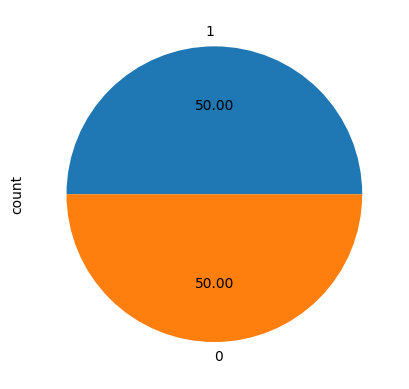

In [43]:
y_train_balanced.value_counts().plot.pie(autopct = '%.2f')

We have already split the data. Just assigning the Split data into X and y for train test split


```
X_train_balanced = X
y_train_balanced = y
```



In [44]:
merged_data = pd.concat([X_train_balanced , y_train_balanced ], axis=1)

In [45]:
merged_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,2,0,5,21,8,6,1,36,1
1,29725,77,0.776,1,1,2,0,5,15,3,5,5,47,0
2,11561,64,0.624,1,1,0,0,5,5,8,6,0,83,0
3,33241,14,0.789,1,1,2,0,1,0,8,5,0,52,1
4,666,50,0.767,1,0,2,2,5,21,3,1,4,8,0


In [46]:
#merged_data.to_csv('aug_train - balanced_dataset.csv', index=False)

```
---------------------------------------------
+                 Feature ===> Importance +
---------------------------------------------
-     city_development_index   => 0.266694  -
-             training_hours   => 0.188497  -
-                 experience   => 0.118171  -
-                company_size  => 0.090542  -
-         enrolled_university  => 0.069776  -
-                last_new_job  => 0.068802  -
-            major_discipline  => 0.059946  -
-             education_level  => 0.055080  -
-                company_type  => 0.048618  -
-         relevent_experience  => 0.018746  -
-                      gender  => 0.015127  -
```



In [47]:
X = X_train_balanced .drop(["enrollee_id"], axis = 1)
y = y_train_balanced

In [48]:
X.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,1,0,2,0,5,21,8,6,1,36
1,77,0.776,1,1,2,0,5,15,3,5,5,47
2,64,0.624,1,1,0,0,5,5,8,6,0,83
3,14,0.789,1,1,2,0,1,0,8,5,0,52
4,50,0.767,1,0,2,2,5,21,3,1,4,8


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **MODEL 1 : XGBOOST**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_train_pred = model.predict(X_train)

In [54]:
score = accuracy_score(y_train, y_train_pred)
score

0.9987396236255378

In [55]:
y_pred = model.predict(X_test)



---



In [56]:
score = accuracy_score(y_test, y_pred)
score

0.8173127064140449

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2873
           1       0.82      0.81      0.82      2880

    accuracy                           0.82      5753
   macro avg       0.82      0.82      0.82      5753
weighted avg       0.82      0.82      0.82      5753



In [58]:
confusion_matrix(y_test,y_pred)

array([[2371,  502],
       [ 549, 2331]])

In [59]:
pickle.dump(model, open("ml_model.sav", "wb"))
pickle.dump(scaler, open("scaler.sav", "wb"))